# Predicting loan Eligibility

## Project Overview
#### Introduction
 This project builds a machine learning model that will identify customers that are eligible for loan or not. The details of the dataset are inforamtion provided by customers while filling out an eligibility form for loan with an Housing Finance company. 
 
 #### Dataset Key Information :
  - Loan_ID --------- Unique Loan ID
  - Gender ---------- Male / Female
  - Married --------- Applicant marriesd (Y/N)
  - Dependents ------- Number of dependents
  - Education -------- Applicant Education (Graduate/ Under Graduate)
  - Self_Employed ---- Self-employed (Y/N)
  - ApplicantIncome --- Applicant income
  - CoapplicantIncome --- Coapplicant income
  - LoanAmount ----------- Loan amount in thousands
  - Loan_Amount_Term ------ Term of a loan in months
  - Credit_History --------- Credit history meets guidelines
  - Property_Area ---------- Urban/ Semi-Urban/Rural
  - Loan_Status ------------ Loan approved (Y/N)
  
#### Type of problem
This is a supervised classification machine learning problem

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import dataset
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
# Make a copy of the original dataframe
df1 = df.copy()

### Data Cleaning

In [9]:
# change columns names to lowercase
def change_column_name(col):
    return col.lower()

In [11]:
new_columns=[]
for i in df1.columns:
    columns = change_column_name(i)
    new_columns.append(columns)
df1.columns= new_columns
df1

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
# Rename selected column names
df1 = df1.rename(columns={"applicantincome" : "applicant_income", "coapplicantincome" : "coapplicant_income", "loanamount" : "loan_amount"})
df1.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
# Checking for null values
df1.isna().sum()

loan_id                0
gender                13
married                3
dependents            15
education              0
self_employed         32
applicant_income       0
coapplicant_income     0
loan_amount           22
loan_amount_term      14
credit_history        50
property_area          0
loan_status            0
dtype: int64

In [17]:
#total number of rows and columns
df1.shape

(614, 13)

In [19]:
# Get the percentage of null values in the columns
# Because of the small size of the dataset I will fill the missing values with mean(numerical columns) or the mode(categorical columns)

sum_null = df1.isnull().sum()
percentage_null = round(sum_null / len(df1) * 100, 2) #2 represents decimal
percentage_null

loan_id               0.00
gender                2.12
married               0.49
dependents            2.44
education             0.00
self_employed         5.21
applicant_income      0.00
coapplicant_income    0.00
loan_amount           3.58
loan_amount_term      2.28
credit_history        8.14
property_area         0.00
loan_status           0.00
dtype: float64

In [21]:
# This function fills the the missing values with mean, or mode according to data types respectively
def fill_missing_values(col):
    if col.dtype == np.dtype(int):
        return col.fillna(col.median())
    elif col.dtype == np.dtype(float):
        return col.fillna(col.median())
    elif col.dtype == np.dtype("O"):
        return col.fillna(col.mode()[0])
    else:
        return col

In [23]:
# Apply the function
for col in df1.columns:
    df1[col] = fill_missing_values(df1[col])

In [25]:
# Check that missing values has been filled
df1.isna().sum()

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64

In [27]:
# Checking random five samples
df1.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
300,LP001964,Male,Yes,0,Not Graduate,No,1800,2934.0,93.0,360.0,0.0,Urban,N
289,LP001935,Male,No,0,Graduate,No,9508,0.0,187.0,360.0,1.0,Rural,Y
537,LP002738,Male,No,2,Graduate,No,3617,0.0,107.0,360.0,1.0,Semiurban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y
342,LP002119,Male,Yes,1,Not Graduate,No,4554,1229.0,158.0,360.0,1.0,Urban,Y


Getting a brief statistics of the numerical columns
We can see that the mean and the median are not so far apart meaning that we might not have much skewness of values in the columns
But the maxixmum values in "loan_amount", "coapplicant_income", and "applicant_income" seems far from the 75th percentile
so we might need to check for outliers in the columns

In [30]:
#descriptive statistics
df1.describe()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Exploratory Data Analysis

In [33]:
# Let's map the target variable "loan_status" so that Y is 1 and N is 0, so as to check the its correlation with other numerical columns
df1["loan_status"] = df1["loan_status"].map({"Y" : 1, "N": 0})

In [35]:
numerical_cols = df1.select_dtypes("number").columns
numerical_cols

Index(['applicant_income', 'coapplicant_income', 'loan_amount',
       'loan_amount_term', 'credit_history', 'loan_status'],
      dtype='object')

In [37]:
df1.select_dtypes("number").corr()["loan_status"]

applicant_income     -0.004710
coapplicant_income   -0.059187
loan_amount          -0.033214
loan_amount_term     -0.022549
credit_history        0.540556
loan_status           1.000000
Name: loan_status, dtype: float64

The credit_history column seems to be the stand out column here, it has a positive correlation with the target variable and its closer to 1 so we might consider credit_column has a feature that will determine loan eligibility this output basically means that since the credit_history is closer to 1, then accoring to the dataset we have the credit_history will determine whether a person is eligible to loan or not.


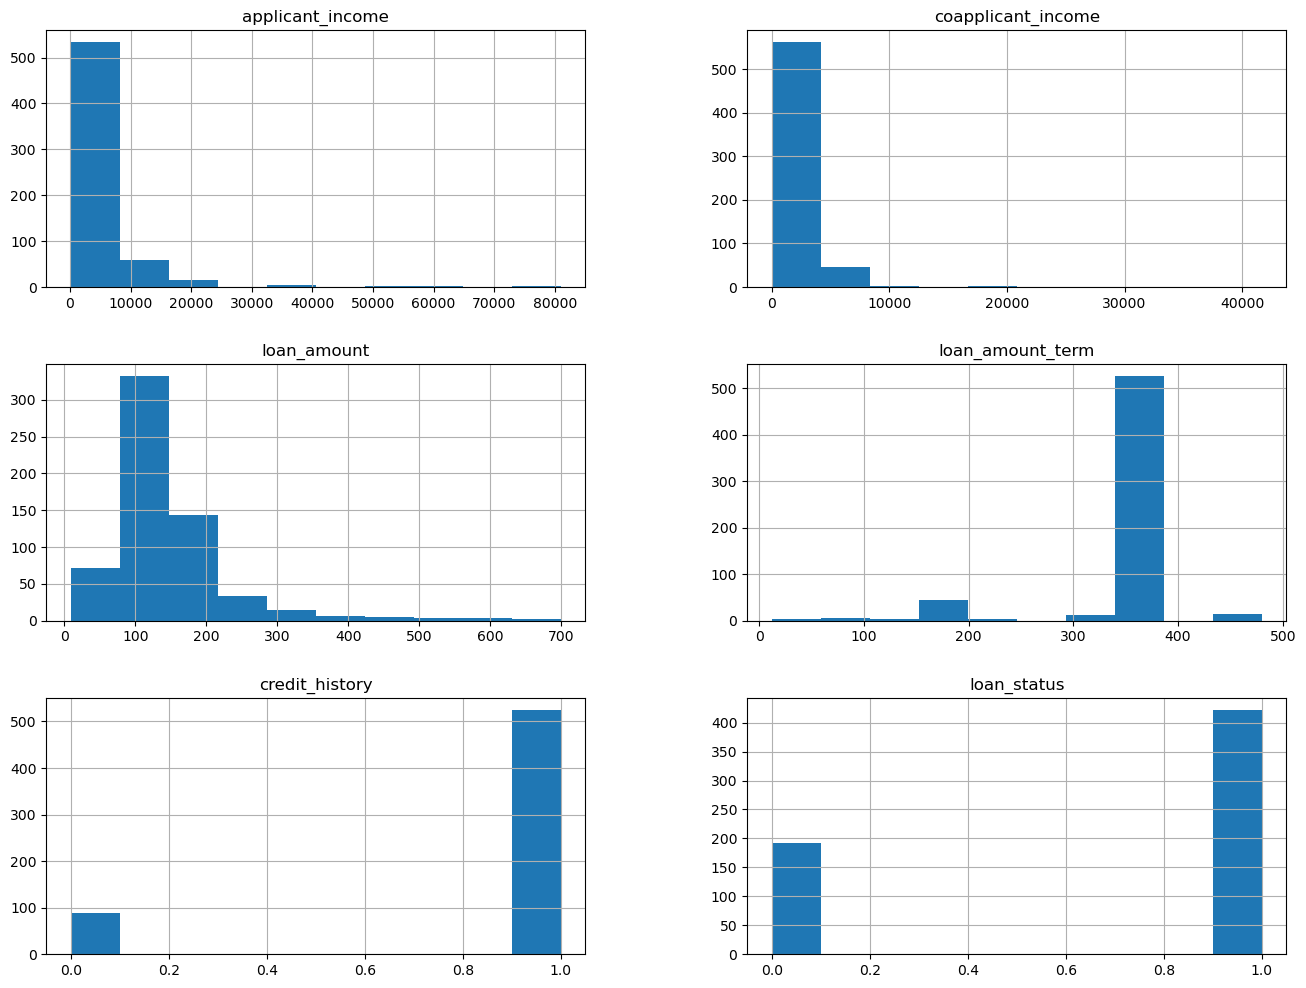

In [40]:
# check for skewed columns by plotting a histogram diagram
df1[numerical_cols].hist(figsize=(16, 12));

####  From the histogram above we can see that the columns "coapplicant_income" and "applicant_income" are rightly skewed just like the dataframe.describe has indicated that there might be extreme values in those columns, we can still explore this further

In [42]:
# "coapplicant_income" and "applicant_income" columns have the highest skewed values
df1[numerical_cols].skew().sort_values(ascending= False)

coapplicant_income    7.491531
applicant_income      6.539513
loan_amount           2.743053
loan_status          -0.809998
credit_history       -2.021971
loan_amount_term     -2.402112
dtype: float64

In [45]:
skewed_cols = ["coapplicant_income", "applicant_income", "loan_amount"]

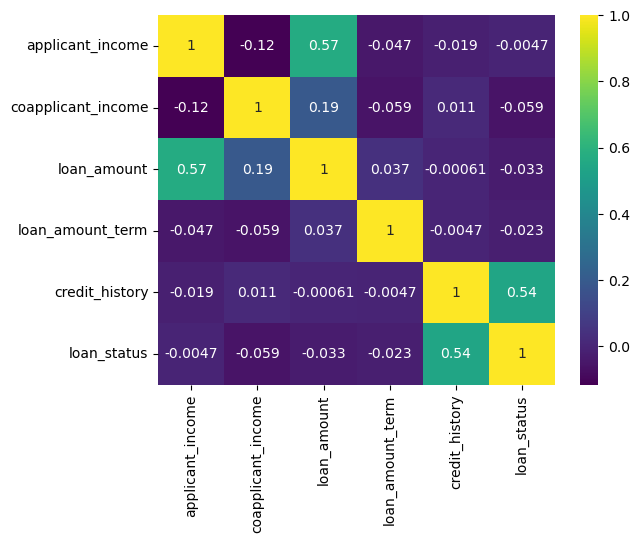

In [47]:
# The heatmap below shows that credit history has a positive correlation with loan status, and the loan amount has a
# positive correlation with applicant income.  
sns.heatmap(data=df1.select_dtypes("number").corr(), cmap="viridis", annot=True);

In [49]:
# Checking for outliers in the dataset
def outliers_func():
        outliers_cols = []
    
        for col in df1.select_dtypes("number"): 
            q1 = df1[col].quantile(.25)
            q3 = df1[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df1[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df1[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [51]:
# calling the outliers function
outlier_columns = outliers_func()

In [53]:
outlier_columns

['applicant_income',
 'coapplicant_income',
 'loan_amount',
 'loan_amount_term',
 'credit_history']

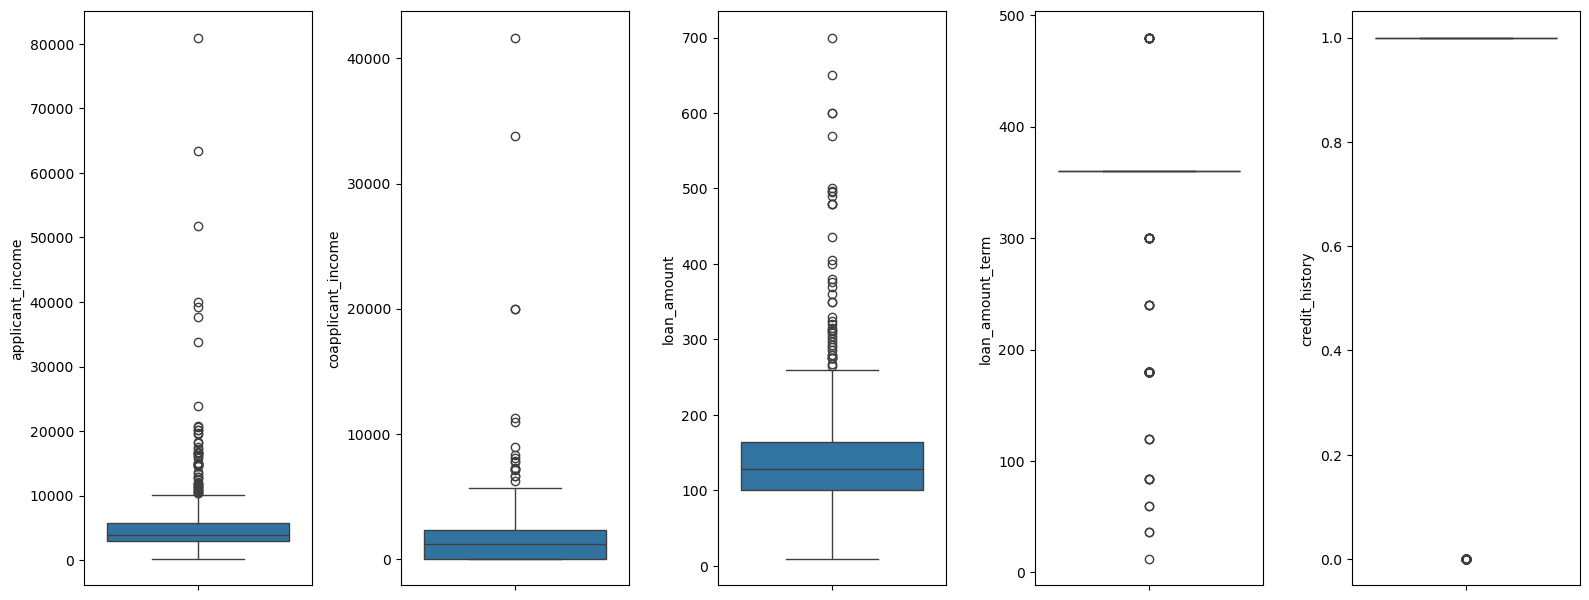

In [55]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(2,5, index+1)
    sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

In [57]:
# Transforming the categorical columns using pandas get_dummies method to explore the correlation between variables
categorical_col = df1.select_dtypes("object")
categorical_col = categorical_col.drop("loan_id", axis=1) #dropping the loan_id as it is not needed
categorical_col = pd.get_dummies(categorical_col)

In [59]:
categorical_col.head()

,gender_Female,gender_Male,married_No,married_Yes,dependents_0,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True


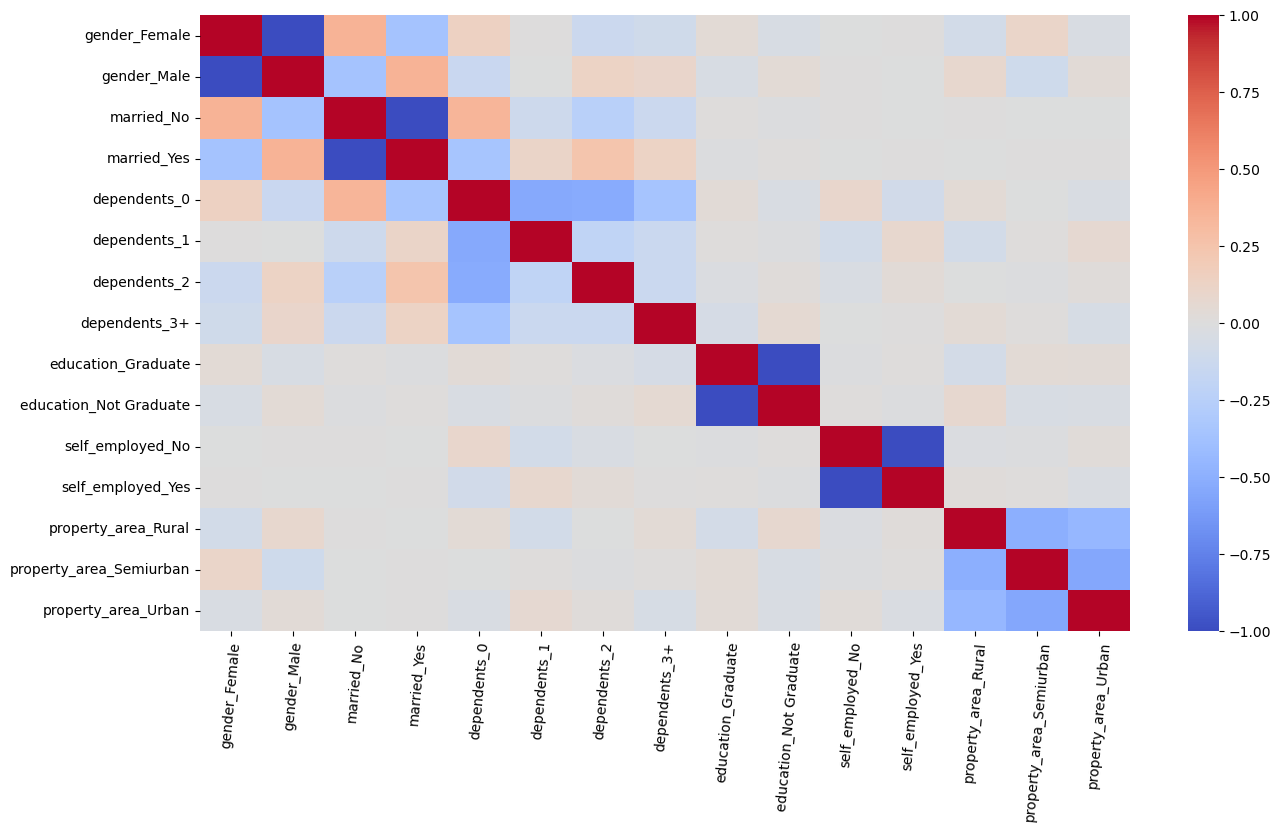

In [61]:
# Heatmap showing the correlation between target variables and transformed categorical columns 
plt.figure(figsize=(15, 8))
sns.heatmap(categorical_col.corr(), cmap="coolwarm")
plt.xticks(rotation = 85);

### Data preprocessing Stage

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### Transforming the skewed columns


In [67]:
df1[skewed_cols] = df1[skewed_cols].apply(lambda x: np.log(x + 1))

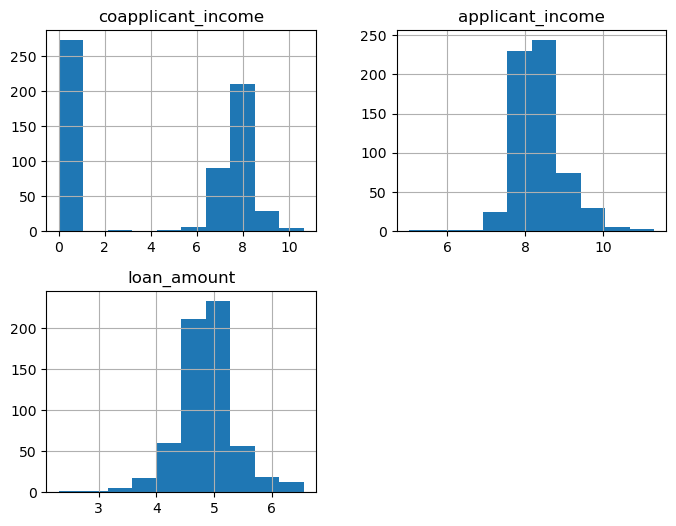

In [69]:
# The figure below shows that the columns have been transformed nicely
df1[skewed_cols].hist(figsize=(8, 6));

In [71]:
# Scaling the columns with outliers
df1[outlier_columns] = scaler.fit_transform(df1[outlier_columns])
df1[outlier_columns]

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history
0,0.516186,-1.107783,-0.012803,0.273231,0.411733
1,0.137806,0.782158,-0.012803,0.273231,0.411733
2,-0.519479,-1.107783,-1.348663,0.273231,0.411733
3,-0.751605,0.897526,-0.143351,0.273231,0.411733
4,0.555727,-1.107783,0.182981,0.273231,0.411733
...,...,...,...,...,...
609,-0.572062,-1.107783,-1.201901,0.273231,0.411733
610,-0.032679,-1.107783,-2.350110,-2.522836,0.411733
611,1.015921,0.308483,1.368737,0.273231,0.411733
612,0.918972,-1.107783,0.755185,0.273231,0.411733


In [73]:
# Data Transformation for Categorical columns in the dataframe
# Dropping the "loan_id column"
df1 = df1.drop("loan_id", axis=1)

In [75]:
df1 = pd.get_dummies(df1)
df1.head()

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,loan_status,gender_Female,gender_Male,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0.516186,-1.107783,-0.012803,0.273231,0.411733,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
1,0.137806,0.782158,-0.012803,0.273231,0.411733,0,False,True,False,True,...,True,False,False,True,False,True,False,True,False,False
2,-0.519479,-1.107783,-1.348663,0.273231,0.411733,1,False,True,False,True,...,False,False,False,True,False,False,True,False,False,True
3,-0.751605,0.897526,-0.143351,0.273231,0.411733,1,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True
4,0.555727,-1.107783,0.182981,0.273231,0.411733,1,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True


## Modelling

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [80]:
# split dataset into training and testing data
target = df1["loan_status"]
predictor_variables = df1.drop("loan_status", axis=1)

In [82]:
target.value_counts()

loan_status
1    422
0    192
Name: count, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, target, test_size= 0.2, random_state= 42)

In [86]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(491, 20) (123, 20)
(491,) (123,)


In [88]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

In [90]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, X_test, y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(X_test)
        training_accuracy = accuracy_score(training_predict, y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores
        

In [92]:
fit_predict_and_score(models, X_train, X_test, y_train, y_test)

{'Logistic Regression': ' has a  score of 0.8126272912423625 on training set and a score of 0.7886178861788617 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 0.6910569105691057 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 0.7804878048780488 on testing set',
 'SVC': ' has a  score of 0.8329938900203666 on training set and a score of 0.7804878048780488 on testing set'}

### Evaluating model performance
I evaluated the performance of the two models that have better score on the test dataset

In [95]:
# Evaluating model performance
TP = target.sum() 
FP = target.shape[0]- TP # type 1 error 
TN = 0
FN = 0 # Type 2 error 

precision = TP / TP + FP

Recall = TP / TP + FN

Accuracy = (TP + TN)/TP + FN + TN + FP

In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)

In [99]:
logreg_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [101]:
# Evaluating the model with 5 fold cross validation
cross_val_score(logreg, X_train, y_train, cv = 5, scoring = "accuracy")

array([0.84848485, 0.80612245, 0.81632653, 0.78571429, 0.80612245])

In [103]:
y_predict = cross_val_predict(logreg, X_test, y_test, cv = 5)

In [105]:
confusion_matrix(y_predict, y_test)

array([[19,  4],
       [24, 76]], dtype=int64)

In [107]:
# Classification report
print(classification_report(y_test, logreg_prediction))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [109]:
SVC = SVC()
SVC.fit(X_train, y_train)
SVC_prediction = SVC.predict(X_test)

Both models perform better with classifying the dataset into customers that are eligible to collect loan than classifying customers that are not elligible for loan collection 

#### Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

In [115]:
LogisticRegression()

LogisticRegression()

In [117]:
#Setting hyperparameters for logistic regression model tuning
param_grid = [{"penalty" : ["l2"],
              "C" : np.logspace(-4, 4, 50),
               "solver" : ["lbfgs", "newton-cg", "liblinear", "sag", "saga"],
              "max_iter" : [100, 1000, 2500, 5000]}]

In [119]:
grid_model = GridSearchCV(logreg, param_grid= param_grid, cv= 3, verbose= True, n_jobs= -1)

In [121]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l2'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [122]:
grid_model.best_estimator_.score(X_test , y_test)

0.7886178861788617

The model performance did not really improve from the original score of 0.788

### STREAMLIT DEPLOYMENT

In [127]:
import pickle

In [129]:
filename = "Loan_Eligibility.sav"
pickle.dump(grid_model, open(filename, "wb"))

In [131]:
# loading the saved model
loaded_model = pickle.load(open("Loan_Eligibility.sav", "rb"))

In [133]:
X_test.head(2)

,applicant_income,coapplicant_income,loan_amount,loan_amount_term,credit_history,gender_Female,gender_Male,married_No,married_Yes,dependents_0,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
350,1.198989,-1.107783,1.157460,0.273231,0.411733,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False
377,0.042536,-1.107783,0.018568,0.273231,0.411733,False,True,False,True,True,False,False,False,True,False,True,False,False,True,False


In [135]:
X_test.shape

(123, 20)

In [137]:
row_index = 14

# Convert to a list and print without column names
row_values = X_test.iloc[row_index]
print(row_values)

applicant_income          -0.364144
coapplicant_income         0.999473
loan_amount               -0.769671
loan_amount_term           0.273231
credit_history             0.411733
gender_Female                 False
gender_Male                    True
married_No                    False
married_Yes                    True
dependents_0                  False
dependents_1                  False
dependents_2                   True
dependents_3+                 False
education_Graduate             True
education_Not Graduate        False
self_employed_No              False
self_employed_Yes              True
property_area_Rural           False
property_area_Semiurban       False
property_area_Urban            True
Name: 137, dtype: object


In [141]:
row_index = 14

# Convert to a list and print without column names
row_values = X_test.iloc[row_index].tolist()
print(row_values)

[-0.3641438286786945, 0.9994731514045894, -0.7696709506980769, 0.2732312961117544, 0.41173269183271005, False, True, False, True, False, False, True, False, True, False, False, True, False, False, True]


In [143]:
input_data = ([-0.3641438286786945, 0.9994731514045894, -0.7696709506980769, 0.2732312961117544, 0.41173269183271005, False, True, False, True, False, False, True, False, True, False, False, True, False, False, True])
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = grid_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Not Eligible")
else:
    print("Eligible")

Eligible
